# instalação das dependencias

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('dadosacoes.csv')
df = pd.read_csv('dadosacoes_limpos.csv')

# Limpar os nomes das colunas, removendo espaços extras e caracteres indesejados
df.columns = df.columns.str.strip()  # Remove espaços extras à esquerda e à direita

# Remover símbolos 'R$', e qualquer outro sufixo que não faça parte do nome da coluna
df.columns = df.columns.str.replace(r' R\$', '', regex=True)  # Remove o símbolo 'R$'
df.columns = df.columns.str.replace(r'\s*//.*', '', regex=True)  # Remove qualquer texto após '//' (como ' -(Bilhões)')
df.columns = df.columns.str.replace(r'\s*-\s*', '_', regex=True)  # Substitui o '-' por um '_'
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Substitui espaços em branco por '_'

# Verificar os nomes das colunas após a limpeza
print(df.columns)

# Garantir que as colunas numéricas estão no tipo correto
df['preco_acao'] = pd.to_numeric(df['preco_acao'], errors='coerce')
df['qtde_cotas'] = pd.to_numeric(df['qtde_cotas'], errors='coerce')
df['valor_de_mercado'] = pd.to_numeric(df['valor_de_mercado'], errors='coerce')  # Agora com o nome correto

# Verificar os tipos de dados das colunas
print(df.dtypes)

# Verificar valores ausentes
print(df.isnull().sum())

# Verificar duplicatas
print(df.duplicated().sum())

# Verificar os primeiros registros
print(df.head())

# Salvar o DataFrame limpo
df.to_csv('dadosacoes_limpos.csv', index=False)

Index(['nome_acao', 'preco_acao', 'qtde_cotas', 'valor_de_mercado'], dtype='object')
nome_acao           object
preco_acao           int64
qtde_cotas           int64
valor_de_mercado     int64
dtype: object
nome_acao           0
preco_acao          0
qtde_cotas          0
valor_de_mercado    0
dtype: int64
0
  nome_acao  preco_acao  qtde_cotas  valor_de_mercado
0     VALE3         194          45              2134
1     SUZB3          91          71              3069
2     SUZB3         165          41              2815
3     SUZB3          56          34              3613
4    GOOGLE         212           9              2975


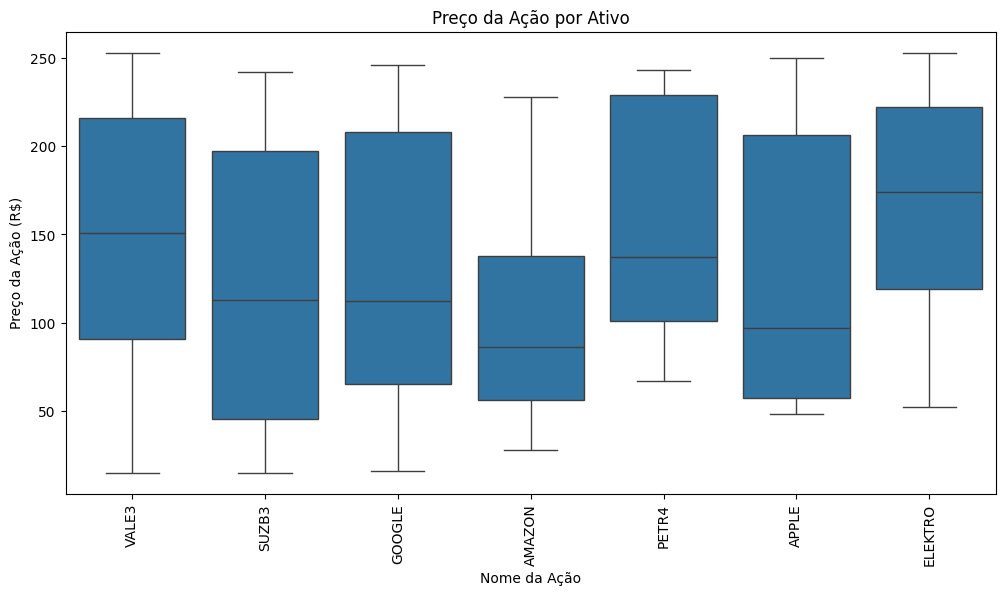

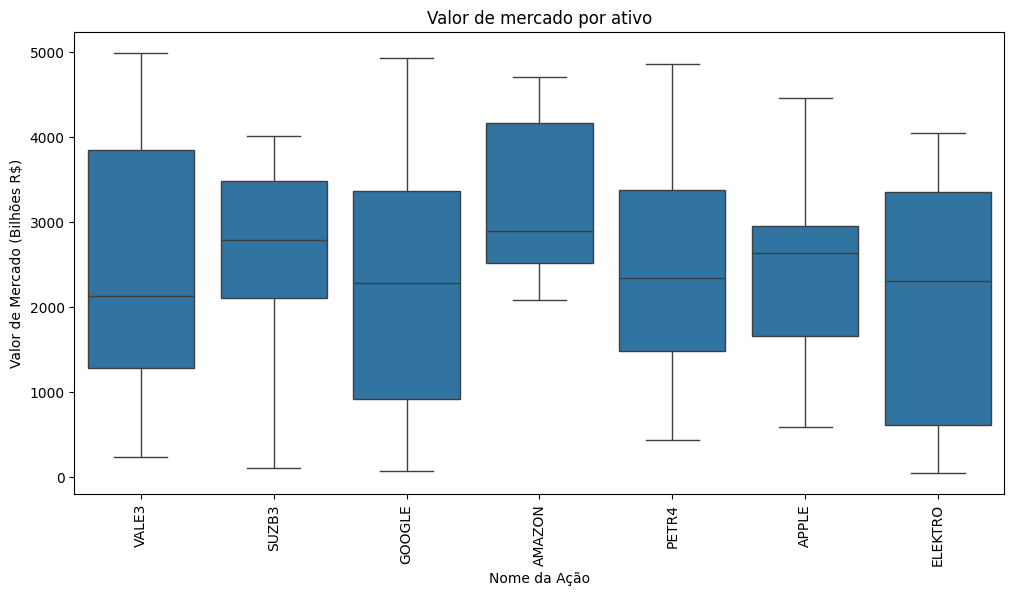

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nome_acao         100 non-null    object
 1   preco_acao        100 non-null    int64 
 2   qtde_cotas        100 non-null    int64 
 3   valor_de_mercado  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

Estatísticas descritivas dos dados:
       preco_acao  qtde_cotas  valor_de_mercado
count  100.000000  100.000000         100.00000
mean   136.140000   52.010000        2433.70000
std     75.237942   27.475791        1397.29373
min     15.000000    2.000000          52.00000
25%     67.000000   28.250000        1189.25000
50%    121.500000   55.500000        2433.00000
75%    209.000000   76.500000        3616.50000
max    253.000000   97.000000        4993.00000


In [7]:
# A - Plotar o preço da ação para cada ativo para verificar outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x='nome_acao', y='preco_acao', data=df)
plt.title('Preço da Ação por Ativo')
plt.xticks(rotation=90)
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação (R$)')
plt.show()

# B - Plotar o valor de mercado da empresa para cada ativo para verificar outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x='nome_acao', y='valor_de_mercado', data=df)
plt.title('Valor de mercado por ativo')
plt.xticks(rotation=90)  # Rotacionar os nomes das ações para melhor visualização
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.show()

# C - Exibir informações do conjunto de dados df.info e estatísticas descritivas df.describe()

# Informações gerais sobre os dados
print("Informações gerais do DataFrame:")
print(df.info())

# Estatísticas descritivas dos dados
print("\nEstatísticas descritivas dos dados:")
print(df.describe())

In [8]:
# Recarregar o CSV, caso df tenha sido sobrescrito
df = pd.read_csv('dadosacoes_limpos.csv')

# Verificar o tipo de df para garantir que é um DataFrame
print(f'Tipo de df: {type(df)}')

# Exibir as primeiras linhas do DataFrame
print("\nPrimeiras linhas do DataFrame:")
print(df.head())

# Lidar com valores ausentes
# Verificar se há valores ausentes no dataset
print("\nValores ausentes por coluna:")
print(df.isnull().sum())  # Isso deve funcionar se df for um DataFrame

# Preencher valores ausentes com a mediana (para as colunas numéricas)
df['preco_acao'] = df['preco_acao'].fillna(df['preco_acao'].median())
df['qtde_cotas'] = df['qtde_cotas'].fillna(df['qtde_cotas'].median())
df['valor_de_mercado'] = df['valor_de_mercado'].fillna(df['valor_de_mercado'].median())

# Codificar variáveis categóricas
# Transformar a coluna 'nome_acao' em variáveis dummy (binárias)
df = pd.get_dummies(df, columns=['nome_acao'], drop_first=True)

# Verificar o DataFrame após a codificação
print("\nDataFrame após a codificação das variáveis categóricas:")
print(df.head())

# Normalizar os dados
scaler = StandardScaler()
df_scaled = df.copy()  # Criar uma cópia para manter os dados originais

# Normalizar as colunas numéricas
df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']] = scaler.fit_transform(df[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Verificar o DataFrame normalizado
print("\nDataFrame normalizado:")
print(df_scaled.head())

Tipo de df: <class 'pandas.core.frame.DataFrame'>

Primeiras linhas do DataFrame:
  nome_acao  preco_acao  qtde_cotas  valor_de_mercado
0     VALE3         194          45              2134
1     SUZB3          91          71              3069
2     SUZB3         165          41              2815
3     SUZB3          56          34              3613
4    GOOGLE         212           9              2975

Valores ausentes por coluna:
nome_acao           0
preco_acao          0
qtde_cotas          0
valor_de_mercado    0
dtype: int64

DataFrame após a codificação das variáveis categóricas:
   preco_acao  qtde_cotas  valor_de_mercado  nome_acao_APPLE  \
0         194          45              2134            False   
1          91          71              3069            False   
2         165          41              2815            False   
3          56          34              3613            False   
4         212           9              2975            False   

   nome_acao_ELEKTRO 


--- Etapa a: Agrupamento com 4 clusters ---
   preco_acao  qtde_cotas  valor_de_mercado  Cluster_4
0         194          45              2134          3
1          91          71              3069          1
2         165          41              2815          0
3          56          34              3613          0
4         212           9              2975          0

--- Etapa b: Agrupamento com 5 clusters ---
   preco_acao  qtde_cotas  valor_de_mercado  Cluster_5
0         194          45              2134          3
1          91          71              3069          4
2         165          41              2815          0
3          56          34              3613          0
4         212           9              2975          0

--- Etapa c: Método do Cotovelo ---


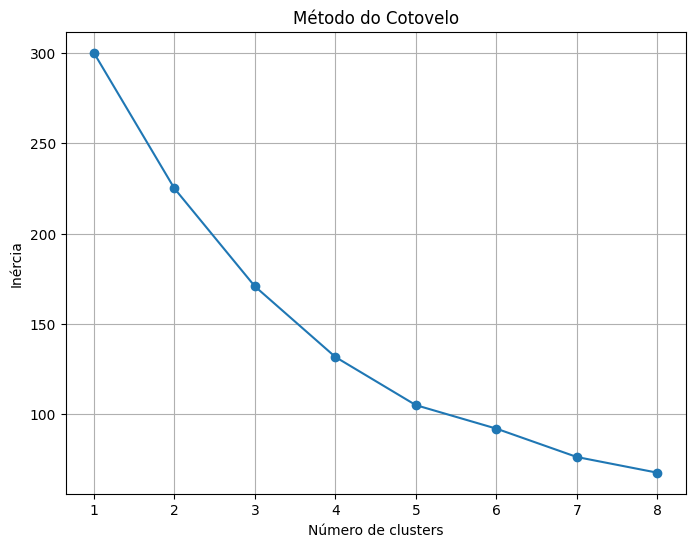


--- Etapa d: Gráficos da Silhueta ---

Calculando para 2 clusters:
Silhouette médio com 2 clusters: 0.237


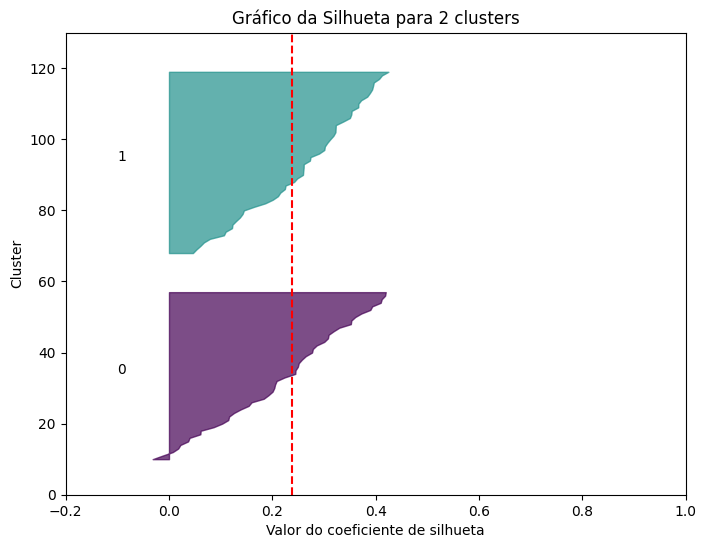


Calculando para 3 clusters:
Silhouette médio com 3 clusters: 0.262


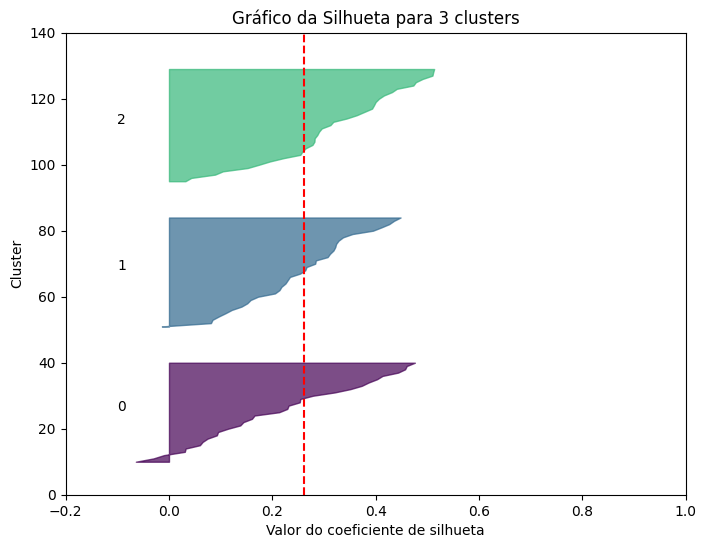


Calculando para 4 clusters:
Silhouette médio com 4 clusters: 0.273


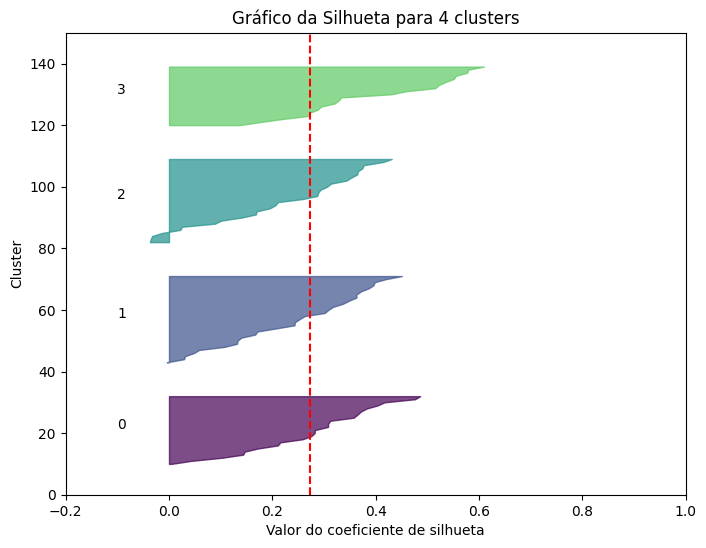


Calculando para 5 clusters:
Silhouette médio com 5 clusters: 0.298


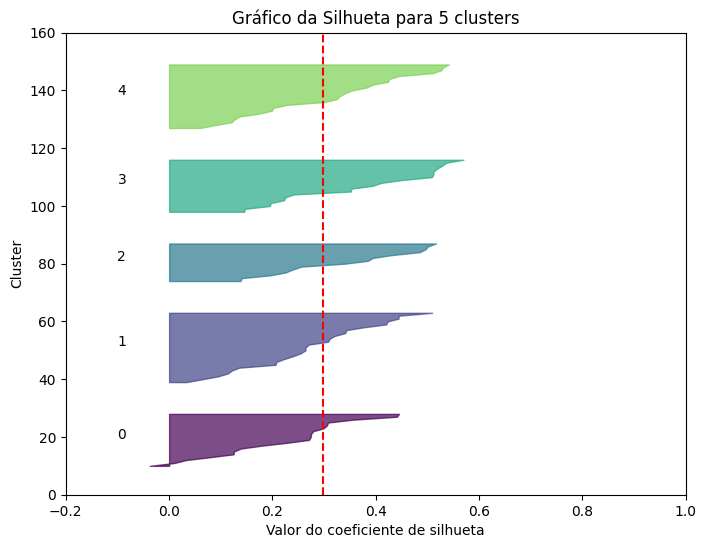


Calculando para 6 clusters:
Silhouette médio com 6 clusters: 0.286


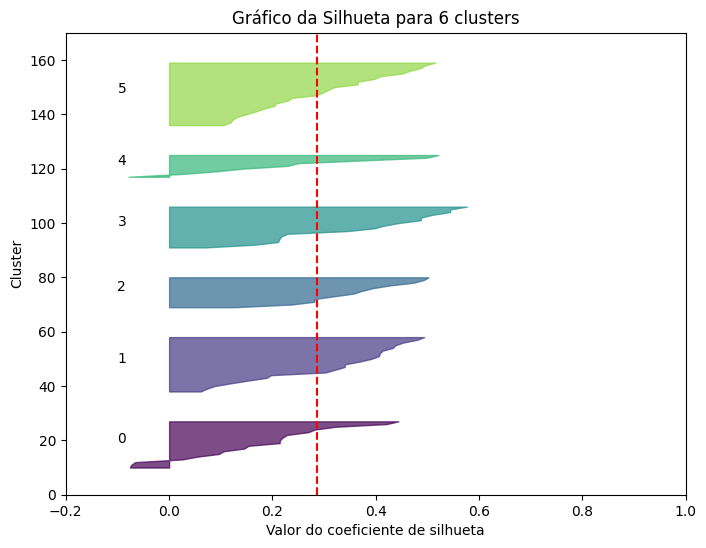


Calculando para 7 clusters:
Silhouette médio com 7 clusters: 0.301


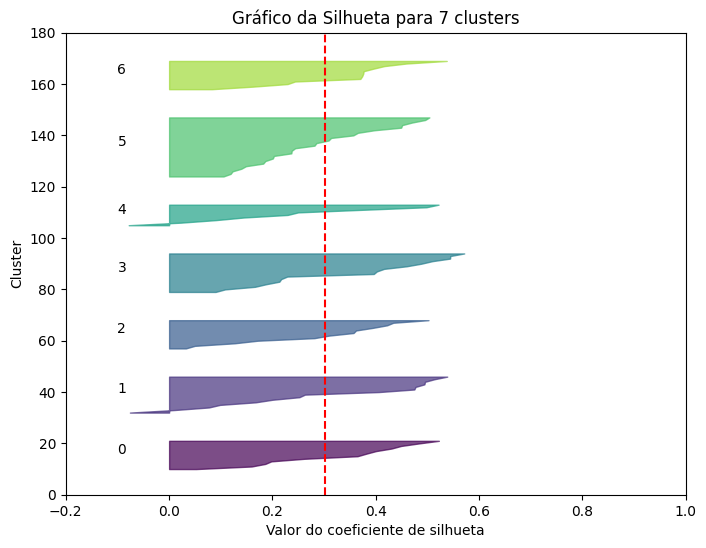


Calculando para 8 clusters:
Silhouette médio com 8 clusters: 0.296


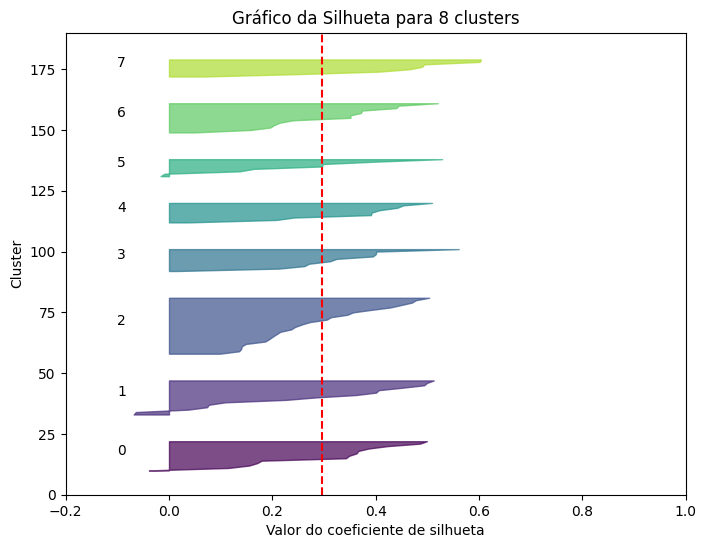

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd
import numpy as np

def plotar_silhueta(num_clusters, dados_normalizados):
    """Função para calcular e plotar o gráfico da silhueta para os clusters."""
    modelo_kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    labels_clusters = modelo_kmeans.fit_predict(dados_normalizados)

    media_silhueta = silhouette_score(dados_normalizados, labels_clusters)
    print(f"Silhouette médio com {num_clusters} clusters: {media_silhueta:.3f}")

    valores_silhueta = silhouette_samples(dados_normalizados, labels_clusters)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.set_xlim([-0.2, 1])
    ax.set_ylim([0, len(dados_normalizados) + (num_clusters + 1) * 10])

    y_min = 10
    for i in range(num_clusters):
        valores_cluster = valores_silhueta[labels_clusters == i]
        valores_cluster.sort()

        tamanho_cluster = len(valores_cluster)
        y_max = y_min + tamanho_cluster

        cor = cm.viridis(float(i) / num_clusters)
        ax.fill_betweenx(np.arange(y_min, y_max), 0, valores_cluster, color=cor, alpha=0.7)

        ax.text(-0.1, y_min + 0.5 * tamanho_cluster, str(i))
        y_min = y_max + 10

    ax.axvline(x=media_silhueta, color="red", linestyle="--")
    ax.set_title(f"Gráfico da Silhueta para {num_clusters} clusters")
    ax.set_xlabel("Valor do coeficiente de silhueta")
    ax.set_ylabel("Cluster")
    plt.show()

# Leitura dos dados
dados = pd.read_csv('dadosacoes_limpos.csv')

# Padronizar os dados
normalizador = StandardScaler()
dados_normalizados = normalizador.fit_transform(dados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# ---- Etapa a: K-means com 4 clusters ----
print("\n--- Etapa a: Agrupamento com 4 clusters ---")
modelo_4_clusters = KMeans(n_clusters=4, random_state=42)
dados['Cluster_4'] = modelo_4_clusters.fit_predict(dados_normalizados)
print(dados[['preco_acao', 'qtde_cotas', 'valor_de_mercado', 'Cluster_4']].head())

# ---- Etapa b: Alterar para 5 clusters ----
print("\n--- Etapa b: Agrupamento com 5 clusters ---")
modelo_5_clusters = KMeans(n_clusters=5, random_state=42)
dados['Cluster_5'] = modelo_5_clusters.fit_predict(dados_normalizados)
print(dados[['preco_acao', 'qtde_cotas', 'valor_de_mercado', 'Cluster_5']].head())

# ---- Etapa c: Gráfico do Cotovelo ----
print("\n--- Etapa c: Método do Cotovelo ---")
inercia_k = []
for k in range(1, 9):
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(dados_normalizados)
    inercia_k.append(modelo.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inercia_k, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters")
plt.ylabel("Inércia")
plt.grid(True)
plt.xticks(range(1, 9))
plt.show()

# ---- Etapa d: Gráficos da Silhueta ----
print("\n--- Etapa d: Gráficos da Silhueta ---")
for num_clusters in range(2, 9):  # A silhueta exige pelo menos 2 clusters
    print(f"\nCalculando para {num_clusters} clusters:")
    plotar_silhueta(num_clusters, dados_normalizados)



--- Passo 1: K-means com 4 clusters ---

Primeiras linhas com agrupamento em 4 clusters:
   preco_acao  qtde_cotas  valor_de_mercado  grupo_4
0    0.772901   -0.256419         -0.215567        3
1   -0.602986    0.694636          0.456955        1
2    0.385515   -0.402735          0.274259        0
3   -1.070520   -0.658788          0.848240        0
4    1.013347   -1.573264          0.389343        0

--- Passo 2: Alterar para 5 clusters ---

Primeiras linhas com agrupamento em 5 clusters:
   preco_acao  qtde_cotas  valor_de_mercado  grupo_5
0    0.772901   -0.256419         -0.215567        3
1   -0.602986    0.694636          0.456955        4
2    0.385515   -0.402735          0.274259        0
3   -1.070520   -0.658788          0.848240        0
4    1.013347   -1.573264          0.389343        0

--- Passo 3: Gráfico do Cotovelo ---


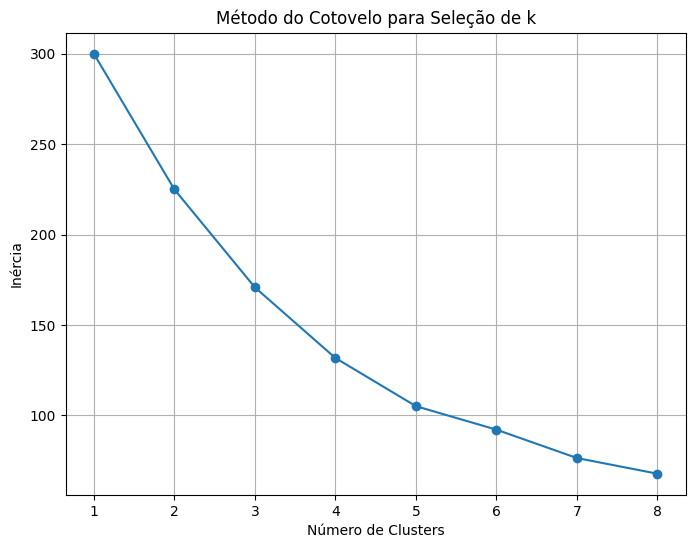


--- Passo 4: Gráfico da Silhueta ---


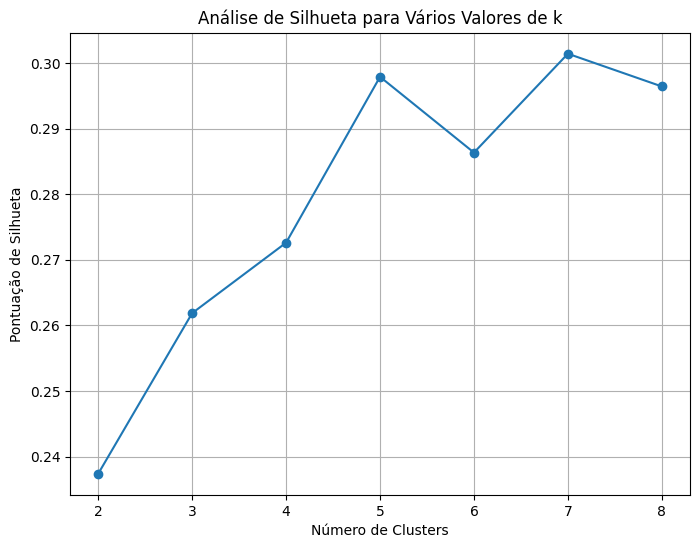

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carregar o conjunto de dados
dados = pd.read_csv('dadosacoes_limpos.csv')

# Normalização dos dados numéricos
normalizador = StandardScaler()
dados_normalizados = dados.copy()  # Manter os dados originais

# Normalizar as colunas relevantes
dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']] = normalizador.fit_transform(dados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# ---- Passo 1: Aplicar K-means com 4 clusters ----
print("\n--- Passo 1: K-means com 4 clusters ---")
modelo_kmeans_4 = KMeans(n_clusters=4, random_state=42)
dados_normalizados['grupo_4'] = modelo_kmeans_4.fit_predict(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Mostrar as primeiras linhas com os grupos atribuídos
print("\nPrimeiras linhas com agrupamento em 4 clusters:")
print(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado', 'grupo_4']].head())

# ---- Passo 2: Alterar para 5 clusters ----
print("\n--- Passo 2: Alterar para 5 clusters ---")
modelo_kmeans_5 = KMeans(n_clusters=5, random_state=42)
dados_normalizados['grupo_5'] = modelo_kmeans_5.fit_predict(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Mostrar as primeiras linhas com os grupos atribuídos
print("\nPrimeiras linhas com agrupamento em 5 clusters:")
print(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado', 'grupo_5']].head())

# ---- Passo 3: Gráfico do Cotovelo para determinar o número ideal de clusters ----
print("\n--- Passo 3: Gráfico do Cotovelo ---")
inercia = []
for num_clusters in range(1, 9):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])
    inercia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inercia, marker='o')
plt.title('Método do Cotovelo para Seleção de k')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 9))
plt.grid(True)
plt.show()

# ---- Passo 4: Gráfico da Silhueta ----
print("\n--- Passo 4: Gráfico da Silhueta ---")
pontuacoes_silhueta = []
for num_clusters in range(2, 9):  # Ignorar 1 cluster
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])
    sil_score = silhouette_score(dados_normalizados[['preco_acao', 'qtde_cotas', 'valor_de_mercado']], kmeans.labels_)
    pontuacoes_silhueta.append(sil_score)

# Plotar o gráfico da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), pontuacoes_silhueta, marker='o')
plt.title('Análise de Silhueta para Vários Valores de k')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhueta')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

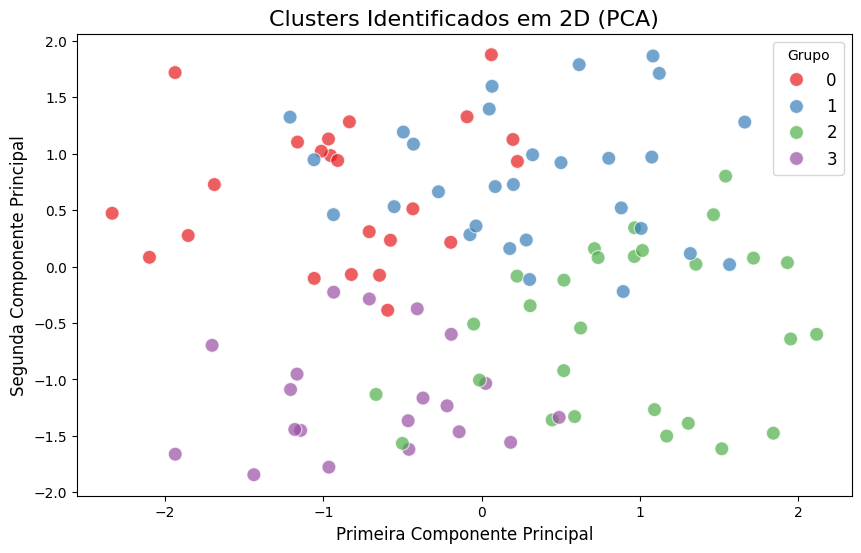

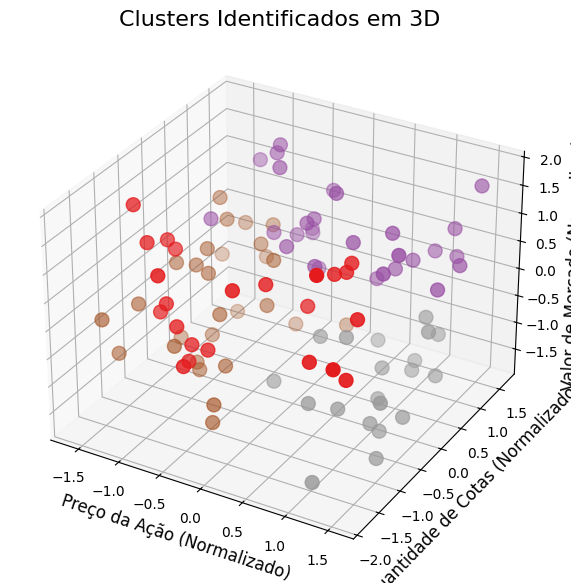

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Carregar o conjunto de dados (assumindo que o DataFrame 'df' já esteja preparado)
df = pd.read_csv('dadosacoes_limpos.csv')

# Normalizando os dados numéricos para aplicar o K-means
scaler = StandardScaler()
df_normalized = df.copy()  # Manter os dados originais intactos

# Aplicar a normalização às colunas relevantes
df_normalized[['preco_acao', 'qtde_cotas', 'valor_de_mercado']] = scaler.fit_transform(df[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Executar o K-means com 4 clusters (ajuste conforme necessário)
kmeans_model = KMeans(n_clusters=4, random_state=42)
df_normalized['cluster'] = kmeans_model.fit_predict(df_normalized[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# ---- a) Gráfico 2D dos clusters ----
# Reduzir a dimensionalidade para 2D usando PCA
pca_model = PCA(n_components=2)
pca_data = pca_model.fit_transform(df_normalized[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Criar o gráfico 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_normalized['cluster'], palette='Set1', s=100, alpha=0.7, edgecolor='white')

# Adicionar título e rótulos
plt.title('Clusters Identificados em 2D (PCA)', fontsize=16)
plt.xlabel('Primeira Componente Principal', fontsize=12)
plt.ylabel('Segunda Componente Principal', fontsize=12)
plt.legend(title='Grupo', loc='best', fontsize=12)
plt.show()

# ---- b) Gráfico 3D dos clusters ----
# Criar o gráfico 3D
figura = plt.figure(figsize=(10, 7))
eixo = figura.add_subplot(111, projection='3d')

# Plotar os pontos em 3D, coloridos por cluster
eixo.scatter(df_normalized['preco_acao'], df_normalized['qtde_cotas'], df_normalized['valor_de_mercado'], c=df_normalized['cluster'], cmap='Set1', s=100)

# Adicionar título e rótulos
eixo.set_title('Clusters Identificados em 3D', fontsize=16)
eixo.set_xlabel('Preço da Ação (Normalizado)', fontsize=12)
eixo.set_ylabel('Quantidade de Cotas (Normalizado)', fontsize=12)
eixo.set_zlabel('Valor de Mercado (Normalizado)', fontsize=12)
plt.show()

5) Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

A maior vantagem do aprendizado não supervisionado em relação ao aprendizado supervisionado é a sua capacidade de descobrir padrões e estruturas ocultas em dados não rotulados. Enquanto o aprendizado supervisionado depende de dados rotulados para treinar modelos, o aprendizado não supervisionado pode explorar grandes volumes de dados sem a necessidade de rótulos, permitindo que os algoritmos identifiquem automaticamente agrupamentos, anomalias e relações entre os dados.